In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
width = 128
height = 128

In [3]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)


In [4]:
trainDatagen = datagen.flow_from_directory(directory='./cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16)
valDatagen = datagen.flow_from_directory(directory='./cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 27558 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [5]:
trainDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [10]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1723/1723 [==============================] - 776s 450ms/step - loss: 0.4736 - accuracy: 0.7612 - val_loss: 0.1695 - val_accuracy: 0.9370
Epoch 2/20
1723/1723 [==============================] - 290s 168ms/step - loss: 0.1829 - accuracy: 0.9447 - val_loss: 0.1552 - val_accuracy: 0.9456
Epoch 3/20
1723/1723 [==============================] - 304s 176ms/step - loss: 0.1628 - accuracy: 0.9515 - val_loss: 0.1389 - val_accuracy: 0.9481
Epoch 4/20
1723/1723 [==============================] - 298s 173ms/step - loss: 0.1500 - accuracy: 0.9531 - val_loss: 0.1342 - val_accuracy: 0.9485
Epoch 5/20
1723/1723 [==============================] - 317s 184ms/step - loss: 0.1410 - accuracy: 0.9545 - val_loss: 0.1295 - val_accuracy: 0.9515
Epoch 6/20
1723/1723 [==============================] - 284s 165ms/step - loss: 0.1356 - accuracy: 0.9555 - val_loss: 0.1392 - val_accuracy: 0.9470
Epoch 7/20
1723/1723 [==============

In [11]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

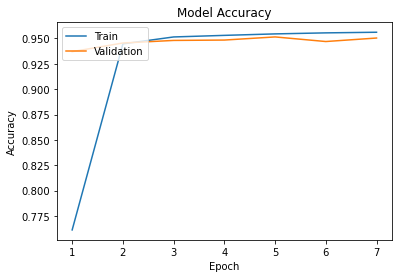

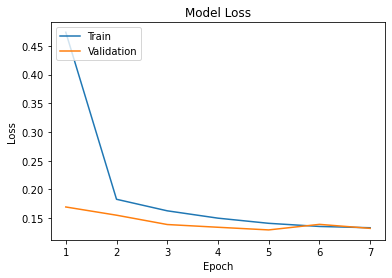

In [23]:
plotLearningCurve(history,7)

In [14]:
model_json = model.to_json()
with open("model99.json","w")as json_file:
    json_file.write(model_json)
model.save_weights("maleria_model99.h5")
print("model is saved")

model is saved


In [15]:
import tensorflow as tf

In [16]:
loaded_model_json = open("model99.json", "r").read()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

loaded_model.load_weights("maleria_model99.h5")

In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [20]:
image = load_img("101.png", target_size=(128, 128))
image = img_to_array(image)
image = np.expand_dims(image, axis = 0)
classes = loaded_model.predict(image)
if classes[0][0] ==0:
    print("Parasitized")
else:
        print("Uninfected")

Parasitized


In [21]:
classes

array([[0.]], dtype=float32)